### DATA UNDERSTANDING

Loading libraries to be used

In [26]:
# For analysis and data manipulation
import pandas as pd
import numpy as np
              
# For model building, model_evaluation and preprocessing of data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Spectral")  # Setting style for plots
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Loading csv file into dataframe

In [2]:
# First five rows of data
student_data = pd.read_csv('http://bit.ly/w-data')
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EXPLORATORY DATA ANALYSIS

Perfoming EDA to understand dataset

In [22]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**As can be seen for the hours column most students studied an average of 5hrs/day and got a score of `51.48`.There is a std of `2.52` meaning there is some spread to the data and not mostly at the centre. It is also interesting to note through the percentages that as the hours increase so does the scores.** 

Drawing scatterplot to see relationship between the hours studied and the score gotten.

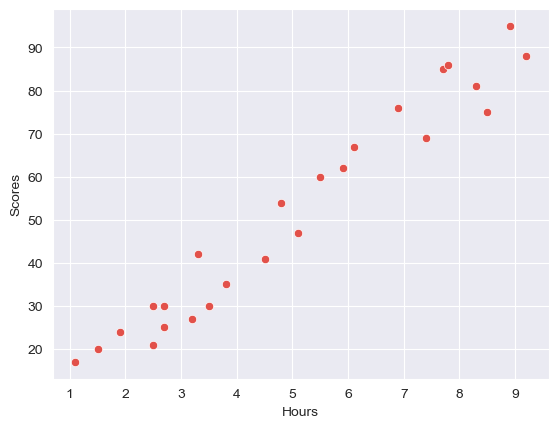

In [28]:
sns.scatterplot(student_data, x=student_data['Hours'], y=student_data['Scores']);

**As can be seen from the graph above there is a positive linear correlation between the number of hours studied and the score gotten by a student.**

### MODELLING

Seperating variables into X and Y, instatiating model, making predictions and finally evaluating model

In [17]:
# Independent and Dependent variable respectively 
X = student_data.drop('Scores', axis=1).values
Y = student_data['Scores'].values

# Test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # Random state for reproducability of code

# Model instatiating and training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)

# R2 score
r2 = r2_score(y_test, predictions)

# Results
print('The root mean squared error of the dataset is', rmse)
print('The r2_score of the dataset is', r2)

The root mean squared error of the dataset is 4.352380006653288
The r2_score of the dataset is 0.9678055545167994


High R2 score of `0.9678` means 96.78% of the variance in the data can be explained by the model.

Seeing regressor line and values through scatter and lineplot

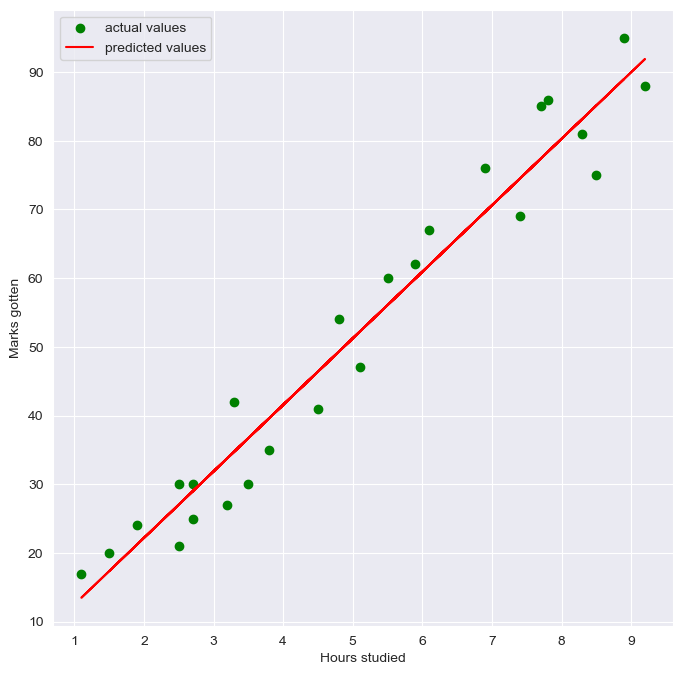

In [4]:
# Regressor line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, color='green', label='actual values')
plt.xlabel('Hours studied')
plt.ylabel('Marks gotten')
plt.plot(X, line, color='red', label='predicted values')
plt.legend(loc='best')
plt.show()

**As can be seen above the `marks gotten` increases linearly with the number of `hours studied`.**

Getting predictions for various hours studied from the data given.

In [5]:
# Dataframe for the number of hours versus the predicted score
df = pd.DataFrame({'Hours': X.flatten(), 'Predicted Score': line.flatten()}) 

# Sorting by hours and making the hours column the index
sorted_df = df.sort_values(by='Hours').set_index('Hours')
sorted_df

,Predicted Score
Hours,
1.1,13.477178
1.5,17.350010
1.9,21.222841
2.5,27.032088
2.5,27.032088
2.7,28.968503
2.7,28.968503
3.2,33.809542
3.3,34.777750


**As number of hours increase so does the score.**

Answering question "What is the score for a person who studied for 9.25hrs/day?"

In [21]:
scalar_value = 9.25
input_value = np.array(scalar_value).reshape(-1, 1)

print('The predicted score for a person who studies 9.5 hrs is', model.predict(input_value))

The predicted score for a person who studies 9.5 hrs is [92.38611528]
